## ALGORITMOS
- Gamero Palacios, Diego Armando
- Leon Flores, Abel Giankrlo

In [2]:
## importacion de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
##cargamos la base de datos
dataframe = pd.read_csv('DSCancerDeMamaSinDatosPerdidos.csv',sep=';')
clasificadores=['Benigno','Maligno']

In [6]:
dataframe.head(10)

,BIRADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
5,3,42,2,1,3,1
6,4,36,3,1,2,0
7,4,60,2,1,2,0
8,4,54,1,1,3,0
9,3,52,3,4,3,0


In [8]:
dataframe.groupby('Severity').size()

Severity
0    425
1    395
dtype: int64

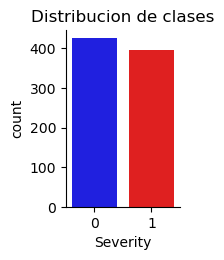

In [10]:
sb.catplot(x='Severity', hue='Severity',data=dataframe, kind="count", height=2.5, aspect=0.8,palette={0:"blue",1:"red"}, legend=False)
plt.title("Distribucion de clases")
plt.show()

In [14]:
y = dataframe['Severity']
x = dataframe.drop('Severity',axis=1)

In [16]:
### DIVISION DE CONJUNTO DE DATOS
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

## KNN

Text(50.722222222222214, 0.5, 'Real')

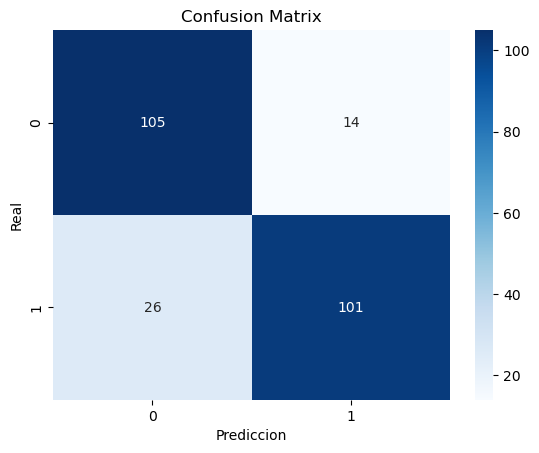

In [21]:
### IMPLEMENTANDO EL ALGORITMO KNN
from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=3)
#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)
##Matriz de confusion
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

sb.heatmap(confusion_matrix(y_test,predicciones),annot=True,fmt="d",cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Prediccion')
plt.ylabel('Real')

In [23]:
### Imprimiendo las metricas
print(classification_report(y_test,predicciones,target_names=clasificadores))

              precision    recall  f1-score   support

     Benigno       0.80      0.88      0.84       119
     Maligno       0.88      0.80      0.83       127

    accuracy                           0.84       246
   macro avg       0.84      0.84      0.84       246
weighted avg       0.84      0.84      0.84       246



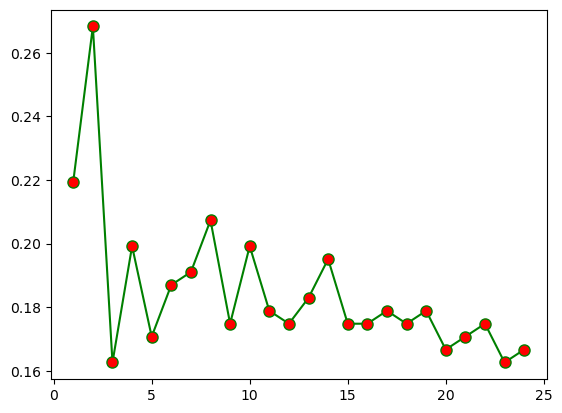

In [25]:
# Evaluar vecino óptimo
tasa_error = []
for i in range(1,25):
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train,y_train)
    prediccion_i = knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

valores = range(1,25)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize='8')

## RANDOM FOREST

Text(50.722222222222214, 0.5, 'Real')

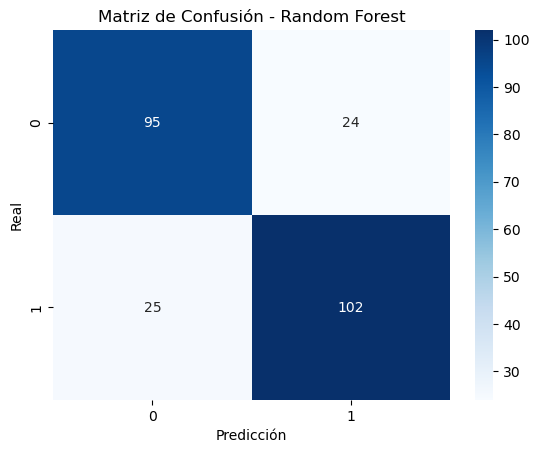

In [28]:
#####Implementamos el algoritmo: RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
#Entrenar el algoritmo
rf_mm = RandomForestClassifier(n_estimators=17, random_state=31)
rf_mm.fit(x_train, y_train)

predicciones_rf = rf_mm.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicciones_rf).ravel()
sb.heatmap(confusion_matrix(y_test, predicciones_rf), annot=True, fmt="d",cmap="Blues")
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')

In [30]:
### Imprimiendo las metricas
print(classification_report(y_test,predicciones_rf,target_names=clasificadores))

              precision    recall  f1-score   support

     Benigno       0.79      0.80      0.79       119
     Maligno       0.81      0.80      0.81       127

    accuracy                           0.80       246
   macro avg       0.80      0.80      0.80       246
weighted avg       0.80      0.80      0.80       246



Text(0, 0.5, 'Tasa de error')

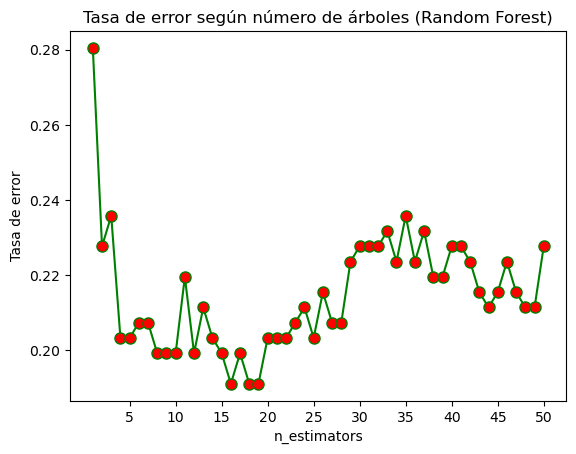

In [34]:
# Evaluar numero de arboles optimo
tasa_error_rf = []

for i in range(1, 51):  
    rf_mm = RandomForestClassifier(n_estimators=i, random_state=31)
    rf_mm.fit(x_train, y_train)
    prediccion_i = rf_mm.predict(x_test)
    error = np.mean(prediccion_i != y_test)
    tasa_error_rf.append(error)

valores = range(1, 51)
plt.plot(valores, tasa_error_rf, color='green', marker='o', markerfacecolor='red', markersize='8')
plt.xticks(np.arange(5, 51, 5))
plt.title('Tasa de error según número de árboles (Random Forest)')
plt.xlabel('n_estimators')
plt.ylabel('Tasa de error')